In [7]:
# Load pickled data
import pickle
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import tensorflow as tf 
from sklearn.utils import shuffle
from tensorflow.contrib.layers import flatten


In [8]:
training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


(32, 32, 3)
21
1.0


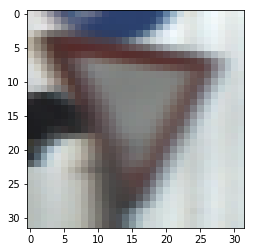

In [9]:
i = random.randint(0, len(X_train))
Im_test = X_train[i]
print(np.shape(Im_test))
print(Im_test.min())

Im_test = Im_test/Im_test.max()
print(Im_test.max())
plt.figure()
plt.imshow(Im_test)
plt.show()

In [10]:
X_train_normalized = []
y_train_normalized = []
X_valid_normalized = []
y_valid_normalized = []

n = 0
rotate_images = 0
normalize_images = 1
for n in range(len(X_train)):
    Im = X_train[n]
    if(normalize_images):
        Im = Im/Im.max()
    lab = y_train[n]
    
    if(rotate_images):
        i = random.randint(0,180)
        M = cv2.getRotationMatrix2D((32/2,32/2),i,1)
        dst = cv2.warpAffine(Im,M,(32,32))
        im_transpose = dst
    
    if(rotate_images):
        X_train_normalized.append(im_transpose)
        X_train_normalized.append(Im)
        y_train_normalized.append(lab)
        y_train_normalized.append(lab)
    else:
        X_train_normalized.append(Im)
        y_train_normalized.append(lab)
        
n = 0
for n in range(len(X_valid)):
    
    Im = X_valid[n]
    if(normalize_images):
        Im = Im/Im.max()
    lab = y_valid[n]
    
    if(rotate_images):
        i = random.randint(0,180)
        M = cv2.getRotationMatrix2D((32/2,32/2),i,1)
        dst = cv2.warpAffine(Im,M,(32,32))
        im_transpose = dst
    
    if(rotate_images):
        X_valid_normalized.append(im_transpose)
        X_valid_normalized.append(Im)
        y_valid_normalized.append(lab)
        y_valid_normalized.append(lab)
    else:
        X_valid_normalized.append(Im)
        y_valid_normalized.append(lab)

print(np.shape(X_valid_normalized))
print(np.shape(y_valid_normalized))

print(np.shape(X_train_normalized))
print(np.shape(y_train_normalized))

(4410, 32, 32, 3)
(4410,)
(34799, 32, 32, 3)
(34799,)


In [11]:
def rrr_lenet(x):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x12.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 12), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(12))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x12. Output = 14x14x12.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x24.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 12, 24), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(24))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x24. Output = 5x5x24.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 600. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(600, 200), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(200))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 200. Output = 100.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(200, 100), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(100))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # SOLUTION: Layer 5: Fully Connected. Input = 100. Output = 42.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(100, 42), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(42))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    
    return logits

In [12]:
#conv1_W = 0

def rrr_test(x):
    
    mu = 0
    sigma = 0.1
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x12.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 12), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(12))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x12. Output = 14x14x12.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Sub layer. Input = 28x28x12. Output = 14x14x12
    #conv1a_W = tf.Variable(tf.truncated_normal(shape = (15,15,12,12), mean = mu, stddev = sigma))
    #conv1a_b = tf.Variable(tf.zeros(12))
    #conv1 = tf.nn.conv2d(conv1, conv1a_W, strides=[1,1,1,1],padding = 'VALID') + conv1_b
    #covn1 = tf.nn.relu(conv1)
    
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x24.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 12, 24), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(24))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 2400. Output = 1616.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(2400, 1200), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(1200))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 1200. Output = 800.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(1200, 800), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(800))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # SOLUTION: Layer 5: Fully Connected. Input = 800. Output = 42.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(800, 42), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(42))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [13]:
def rrr_test2(x):
    
    mu = 0
    sigma = 0.1
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x12.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 12), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(12))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x12. Output = 14x14x12.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Sub layer. Input = 28x28x12. Output = 14x14x12
    #conv1a_W = tf.Variable(tf.truncated_normal(shape = (15,15,12,12), mean = mu, stddev = sigma))
    #conv1a_b = tf.Variable(tf.zeros(12))
    #conv1 = tf.nn.conv2d(conv1, conv1a_W, strides=[1,1,1,1],padding = 'VALID') + conv1_b
    #covn1 = tf.nn.relu(conv1)
    
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x24.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 12, 24), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(24))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    
    conv2 = tf.nn.max_pool(conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 600. Output = 400.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(600, 400), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(400))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 400. Output = 200.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(400, 200), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(200))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # SOLUTION: Layer 5: Fully Connected. Input = 200. Output = 42.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(200, 42), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(42))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [14]:
def evaluate(X_data, y_data, drop_en):
    num_examples = len(X_data)
    total_accuracy = 0
    if(drop_en):
        kp = 0.5
    else:
        kp = 1.0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BatchSize):
        batch_x, batch_y = X_data[offset:offset + BatchSize], y_data[offset:offset + BatchSize]
        accuracy = sess.run(accuracy_operation, feed_dict = {x: batch_x, y: batch_y, keep_prob: kp})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy/num_examples


In [15]:
def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess)
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [17]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y,42)

Epochs = 70
BatchSize = 128

rate = 0.00005
#rate = tf.Variable(0.0001)
learning_rate = tf.placeholder(tf.float32, (None))
global_step = tf.Variable(0, trainable=False)
#starter_learning_rate = 0.00025
#learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
#                                           10, 0.96, staircase=True)
logits = rrr_lenet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels = one_hot_y, logits = logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation) #, global_step = global_step)

correct_prediction = tf.equal(tf.argmax(logits,1), tf.argmax(one_hot_y,1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

use_processed_data = 1

saver = tf.train.Saver()

if(use_processed_data):
    X_train = X_train_normalized
    y_train = y_train_normalized
    X_valid = X_valid_normalized
    y_valid = y_valid_normalized

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print('Training...')
    print()
    
    training_accuracy = 0.000
    rate = 0.1
    for i in range(Epochs):
        X_train, y_train = shuffle(X_train, y_train)
        #if training_accuracy > 0.6:
        #        rate = rate/2
        for offset in range(0,num_examples,BatchSize):
            end = offset + BatchSize
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            
            sess.run(training_operation, feed_dict ={x: batch_x, y:batch_y, keep_prob :0.5})
        
        training_accuracy = evaluate(X_train, y_train,1)
        #training_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid,0)
        #if(validation_accuracy > 0.8):
        #    rate = rate/2
            
        print('Epoch {} ....'.format(i+1))
        print('Training Accuracy = {:.3f}'.format(training_accuracy))
        print('Validation Accuracy = {:.3f}'.format(validation_accuracy))
        print()
        
    save_path = saver.save(sess, "/rrr.ckpt")    
    #saver.save(sess, './rrr_Lenet_ModA')
    #print('Model saved')

ValueError: At least two variables have the same name: Variable_3

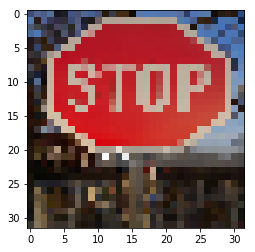

(1, 32, 32, 3)
(2, 32, 32, 3)


In [28]:
Im_test = cv2.imread('TestImageB_Stop.jpg')

height, width = 32, 32
res = cv2.resize(Im_test,(width, height), interpolation = cv2.INTER_CUBIC)
b,g,r = cv2.split(res)
img2 = cv2.merge([r,g,b])
img2 = img2/img2.max()


plt.figure()
plt.imshow(img2)
plt.show()

img3 = np.reshape(img2 , newshape=(-1, 32, 32, 3))
print(np.shape(img3))

#plt.figure()
#plt.imshow(img3)
#plt.show()
imt = []
imt.append(img2)

Im_test = cv2.imread('TestImageA_30KmHr.jpg')

height, width = 32, 32
res = cv2.resize(Im_test,(width, height), interpolation = cv2.INTER_CUBIC)
b,g,r = cv2.split(res)
img2 = cv2.merge([r,g,b])
img2 = img2/img2.max()
imt.append(img2)
print(np.shape(imt))

In [36]:
with tf.Session() as sess:   
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    #saver = tf.train.import_meta_graph('rrr_Lenet_ModA.meta')
    #ckpt = tf.train.get_checkpoint_state('./')
    #saver.restore(sess)#, tf.train.latest_checkpoint('./'))
    #saver.restore(sess,'/rrr_covnet.meta')
    #predictions = tf.argmax(logits, 1)
    #check = predictions.eval(feed_dict = {x: imt, keep_prob: 0}) 
    #check = sess.run(logits, feed_dict = {x: imt, keep_prob: 0})
    print(sess.run(logits,feed_dict = {x: imt, keep_prob: 0}))
    #print(check)
    #print(test_accuracy = evaluate(imt, [1,2], 0))

FailedPreconditionError: Attempting to use uninitialized value Variable_33
	 [[Node: Variable_33/read = Identity[T=DT_FLOAT, _class=["loc:@Variable_33"], _device="/job:localhost/replica:0/task:0/cpu:0"](Variable_33)]]

Caused by op 'Variable_33/read', defined at:
  File "C:\Users\rranade\AppData\Local\conda\conda\envs\carnd-term1\lib\runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\rranade\AppData\Local\conda\conda\envs\carnd-term1\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\rranade\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\rranade\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\rranade\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\rranade\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\rranade\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\rranade\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\rranade\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\rranade\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\rranade\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\rranade\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\rranade\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\rranade\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\rranade\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\rranade\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\rranade\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\rranade\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\IPython\core\interactiveshell.py", line 2683, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\rranade\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\IPython\core\interactiveshell.py", line 2787, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\rranade\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\IPython\core\interactiveshell.py", line 2847, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-f3e1a41a4e5c>", line 16, in <module>
    logits = rrr_lenet(x)
  File "<ipython-input-11-900126370e9e>", line 51, in rrr_lenet
    fc3_b  = tf.Variable(tf.zeros(42))
  File "C:\Users\rranade\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\tensorflow\python\ops\variables.py", line 224, in __init__
    expected_shape=expected_shape)
  File "C:\Users\rranade\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\tensorflow\python\ops\variables.py", line 370, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "C:\Users\rranade\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 1424, in identity
    result = _op_def_lib.apply_op("Identity", input=input, name=name)
  File "C:\Users\rranade\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 759, in apply_op
    op_def=op_def)
  File "C:\Users\rranade\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\tensorflow\python\framework\ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "C:\Users\rranade\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\tensorflow\python\framework\ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value Variable_33
	 [[Node: Variable_33/read = Identity[T=DT_FLOAT, _class=["loc:@Variable_33"], _device="/job:localhost/replica:0/task:0/cpu:0"](Variable_33)]]
